In [3]:
import numpy as np
import pandas as pd
import graphviz as gr
import networkx as nx

In [2]:
url = 'https://github.com/matheusfacure/causal-inference-in-python-code/blob/main/causal-inference-in-python/data/cross_sell_email.csv?raw=true'

treatment_column = "cross_sell_email"
control_group = "no_email"

df = pd.read_csv(url)
df["control"] = df[treatment_column].apply(lambda x: int(x == control_group))
df.tail()

,gender,cross_sell_email,age,conversion,control
318,0,long,18,0,0
319,1,no_email,16,0,1
320,0,no_email,15,0,1
321,1,no_email,16,0,1
322,1,long,24,1,0


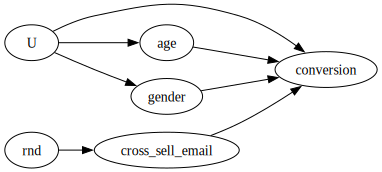

In [5]:
g_cross_sell = gr.Digraph(graph_attr={"rankdir": "LR"})

g_cross_sell.edge("U", "conversion")
g_cross_sell.edge("U", "age")
g_cross_sell.edge("U", "gender")

g_cross_sell.edge("rnd", "cross_sell_email")

g_cross_sell.edge("cross_sell_email", "conversion")
g_cross_sell.edge("age", "conversion")
g_cross_sell.edge("gender", "conversion")

g_cross_sell

In [7]:
model = nx.DiGraph([
    ("C", "A"),
    ("C", "B"),
    ("D", "A"),
    ("B", "E"),
    ("F", "E"),
    ("A", "G")
])

model

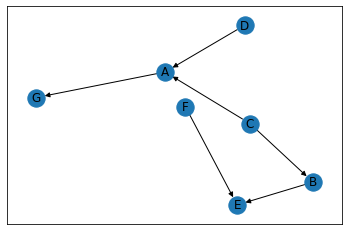

In [17]:
nx.draw_networkx(model)

In [12]:
print ("D, C and A form a collider")
print ("Are D and C dependent?", not(nx.d_separated(model, {"D"}, {"C"}, {})))
print ("Are D and C dependent given A?", not(nx.d_separated(model, {"D"}, {"C"}, {"A"})))
print ("Are D and C dependent given G?", not(nx.d_separated(model, {"D"}, {"C"}, {"G"})))b

D, C and A form a collider
Are D and C dependent? False
Are D and C dependent given A? True
Are D and C dependent given G? True


In [18]:
print ("F, B and E form a collider")
print ("Are F and B dependent?", not(nx.d_separated(model, {"F"}, {"B"}, {})))
print ("Are F and B dependent given E?", not(nx.d_separated(model, {"F"}, {"B"}, {"E"})))
print ("Are F and B dependent given G?", not(nx.d_separated(model, {"F"}, {"B"}, {"G"})))

F, B and E form a collider
Are F and B dependent? False
Are F and B dependent given E? True
Are F and B dependent given G? False


In [13]:
print ("D, A and G form a chain")
print ("Are G and D dependent?", not(nx.d_separated(model, {"G"}, {"D"}, {})))
print ("Are G and D dependent given A?", not(nx.d_separated(model, {"G"}, {"D"}, {"A"})))

D, A and G form a chain
Are G and D dependent? True
Are G and D dependent given A? False


In [14]:
print ("A, B and C form a fork")
print ("Are A and B dependent?", not(nx.d_separated(model, {"A"}, {"B"}, {})))
print ("Are A and B dependent given C?", not(nx.d_separated(model, {"A"}, {"B"}, {"C"})))

A, B and C form a fork
Are A and B dependent? True
Are A and B dependent given C? False


In [15]:
print ("Does association flow between G and F?")
print ("Are G and F dependent?", not(nx.d_separated(model, {"G"}, {"F"}, {})))
print ("Are G and F dependent given E?", not(nx.d_separated(model, {"G"}, {"F"}, {"E"})))

Does association flow between G and F?
Are G and F dependent? False
Are G and F dependent given E? True


# An Identification Example with Data

In [20]:
df = pd.DataFrame({
    'profits_prev_6m':[1, 1, 1, 5, 5, 5],
    'consultancy':[0, 0, 1, 0, 1, 1],
    'profits_next_6m':[1, 1.1, 1.2, 5.5, 5.7, 5.7]
})

df

,profits_prev_6m,consultancy,profits_next_6m
0,1,0,1.0
1,1,0,1.1
2,1,1,1.2
3,5,0,5.5
4,5,1,5.7
5,5,1,5.7


If you simply compare `profits_next_6m` of the companies that hired consultants with those that didn't, you'll get a difference of 1.66MM in profits

In [21]:
df.query("consultancy==1")["profits_next_6m"].mean() - df.query("consultancy==0")["profits_next_6m"].mean()

1.666666666666667

In [24]:
avg_df = (
    df
    .groupby(["consultancy", "profits_prev_6m"])
    ["profits_next_6m"]
    .mean()
)

avg_df.loc[1] - avg_df.loc[0]

profits_prev_6m
1    0.15
5    0.20
Name: profits_next_6m, dtype: float64